Inspiration from:
What are the risk correlated to COVID-19?
US-specific population risk
By: Myrna M Figueroa Lopez
https://www.kaggle.com/fireballbyedimyrnmom/health-risks-and-covid19

In [92]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

In [140]:
df = pd.read_csv('data/us-counties.csv')
#df = df.rename(columns={'date': 'Date', 'state':'State', 'cases':'Cases', 'deaths':'Deaths'})
USA=df.drop(['fips','county'], axis = 1) 
USA.date=USA.date.apply(lambda x: int(''.join(x.split('-'))))
USA

,date,state,cases,deaths
0,20200121,Washington,1,0
1,20200122,Washington,1,0
2,20200123,Washington,1,0
3,20200124,Illinois,1,0
4,20200124,Washington,1,0
...,...,...,...,...
43280,20200408,Wyoming,1,0
43281,20200408,Wyoming,5,0
43282,20200408,Wyoming,39,0
43283,20200408,Wyoming,2,0


In [94]:
#plt.figure(figsize=(19,17))
#plt.title('Cases by State') # Title
#sns.lineplot(x="Date", y="Cases", hue="State",data=USA, palette="Paired")
#plt.xticks(USA.Date.unique(), rotation=90) # All values in the x axis rotate 90 degrees
#plt.show()

In [95]:
##For ease of visualization
NY=USA.loc[USA['state']== 'New York']
LA=USA.loc[USA['state']== 'Louisiana']
WA=USA.loc[USA['state']== 'Washington']
IL=USA.loc[USA['state']== 'Illinois']
Mich=USA.loc[USA['state']== 'Michigan']
PUR=USA.loc[USA['state']== 'Puerto Rico']

In [96]:
AL = USA.loc[USA['state'] == 'Alabama']
FL = USA.loc[USA['state'] == 'Florida']
GA = USA.loc[USA['state'] == 'Georgia']

In [97]:
# Concatenate dataframes 
States=pd.concat([NY,LA,WA,IL,PUR,Mich]) 

States=States.sort_values(by=['date'], ascending=True)
States


,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
4,2020-01-24,Washington,1,0
3,2020-01-24,Illinois,1,0
...,...,...,...,...
41701,2020-04-08,Louisiana,123,7
41702,2020-04-08,Louisiana,27,0
41703,2020-04-08,Louisiana,135,4
42252,2020-04-08,New York,6413,98


In [98]:
# Concatenate dataframes 
myStates=pd.concat([AL,FL,GA]) 

myStates=myStates.sort_values(by=['date'], ascending=True)
myStates


,date,state,cases,deaths
411,2020-03-01,Florida,1,0
412,2020-03-01,Florida,1,0
442,2020-03-02,Georgia,2,0
441,2020-03-02,Florida,1,0
440,2020-03-02,Florida,1,0
...,...,...,...,...
41042,2020-04-08,Florida,68,2
41043,2020-04-08,Florida,108,1
41044,2020-04-08,Florida,5460,50
41064,2020-04-08,Florida,2,0


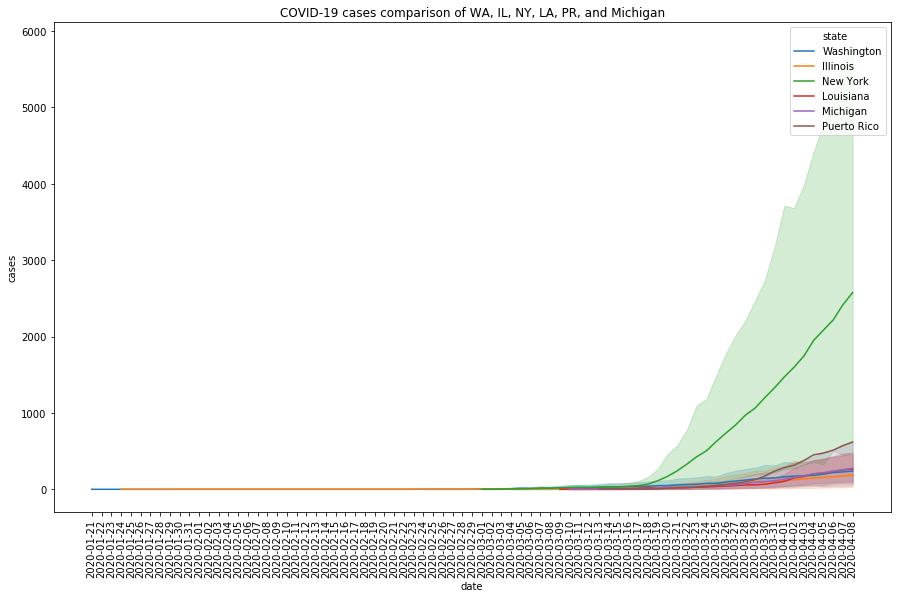

In [99]:
plt.figure(figsize=(15,9))
plt.title('COVID-19 cases comparison of WA, IL, NY, LA, PR, and Michigan') # Title
sns.lineplot(x="date", y="cases", hue="state",data=States)
plt.xticks(States.date.unique(), rotation=90) # All values in the x axis rotate 90 degrees
plt.show()

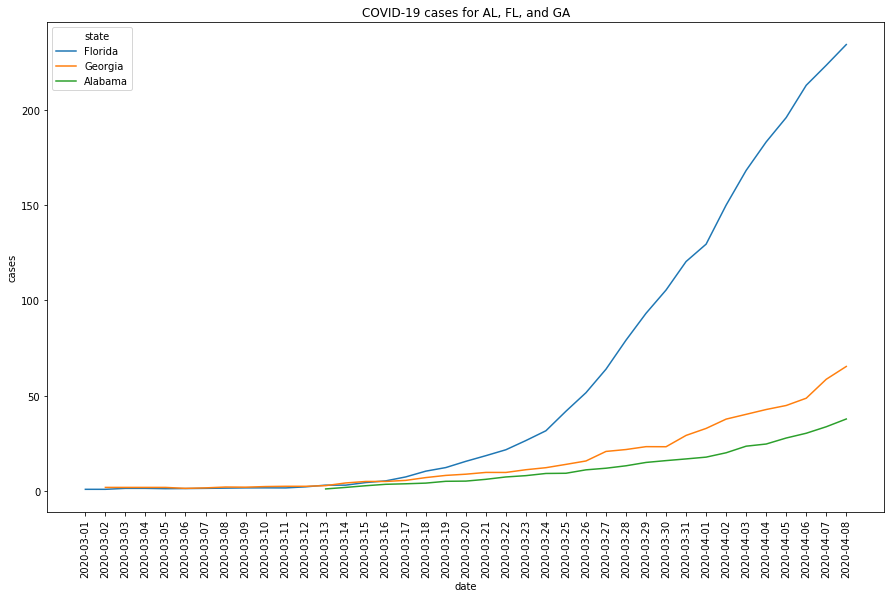

In [100]:
plt.figure(figsize=(15,9))
plt.title('COVID-19 cases for AL, FL, and GA') 
sns.lineplot(x="date", y="cases", hue="state",data=myStates, ci=None)
plt.xticks(myStates.date.unique(), rotation=90) 
plt.show()

In [101]:
USAg=USA.groupby(['date']).max()
USAg

,state,cases,deaths
date,,,
2020-01-21,Washington,1,0
2020-01-22,Washington,1,0
2020-01-23,Washington,1,0
2020-01-24,Washington,1,0
2020-01-25,Washington,1,0
...,...,...,...
2020-04-04,Wyoming,63307,2254
2020-04-05,Wyoming,67552,2472
2020-04-06,Wyoming,68776,3485


In [102]:
USAg=USAg.sort_values(by=['cases'], ascending=True)
USAg

,state,cases,deaths
date,,,
2020-01-21,Washington,1,0
2020-01-28,Washington,1,0
2020-01-27,Washington,1,0
2020-01-26,Washington,1,0
2020-01-29,Washington,1,0
...,...,...,...
2020-04-04,Wyoming,63307,2254
2020-04-05,Wyoming,67552,2472
2020-04-06,Wyoming,68776,3485


**Social vulnerabilities in US**: https://svi.cdc.gov/Documents/Data/2018_SVI_Data/SVI2018Documentation.pdf

In [103]:
us_vuln = pd.read_csv('data/SVI2018_US_COUNTY.csv')
us_vuln = us_vuln.rename(columns = {x:x.lower() for x in us_vuln.columns})
#for x in us_vuln.columns: print(x)

In [187]:
#epl_x -> estimated percentile for percent
#pov -> below poverty
#age17 or younger
#age65 or older
us_vuln = us_vuln[['state', 'ep_uninsur', 'epl_pov','epl_unemp','epl_age65','epl_age17','epl_disabl']]

In [105]:
# converting and overwriting values in column 
us_vuln["state"]=us_vuln["state"].str.lower()
us_vuln["state"]=us_vuln["state"].str.title()

In [106]:
us_vuln.head()

,state,ep_uninsur,epl_pov,epl_unemp,epl_age65,epl_age17,epl_disabl
0,New Mexico,10.6,-999.0000,-999.0000,0.4893,0.6826,0.5610
1,Alabama,7.1,0.5401,0.2745,0.1850,0.7529,0.7905
2,Alabama,11.0,0.4723,0.2611,0.4715,0.6406,0.3763
3,Alabama,10.2,0.8860,0.6968,0.5928,0.5578,0.6845
4,Alabama,9.4,0.7322,0.8850,0.3664,0.4323,0.8564


In [107]:
us_vuln.describe()

,ep_uninsur,epl_pov,epl_unemp,epl_age65,epl_age17,epl_disabl
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,10.081954,0.179473,0.175977,0.496641,0.495322,0.496659
std,5.099991,17.833466,17.833408,0.289027,0.288761,0.289219
min,1.700000,-999.000000,-999.000000,0.000000,0.000000,0.000000
25%,6.200000,0.249700,0.245500,0.244050,0.247100,0.248300
50%,9.200000,0.493600,0.487600,0.489300,0.490600,0.490600
75%,12.675000,0.749400,0.748100,0.745600,0.740500,0.743400
max,45.600000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
us_vuln.corr().style.background_gradient(cmap='viridis')

,ep_uninsur,epl_pov,epl_unemp,epl_age65,epl_age17,epl_disabl
ep_uninsur,1,0.00488438,0.00249231,-0.157514,0.284075,0.144293
epl_pov,0.00488438,1,0.999904,-0.000573652,-0.0115657,0.00477987
epl_unemp,0.00249231,0.999904,1,-0.00147949,-0.0120855,0.00347375
epl_age65,-0.157514,-0.000573652,-0.00147949,1,-0.541353,0.450919
epl_age17,0.284075,-0.0115657,-0.0120855,-0.541353,1,-0.274685
epl_disabl,0.144293,0.00477987,0.00347375,0.450919,-0.274685,1


df on **illness prevalence**

In [109]:
#https://healthdata.gov/dataset/500-cities-census-tract-level-data-gis-friendly-format-2019-release
#https://chronicdata.cdc.gov/500-Cities/500-Cities-Census-Tract-level-Data-GIS-Friendly-Fo/k86t-wghb <- info on columns
census = pd.read_csv("data/500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release.csv")
census = census.rename(columns = {x:x.lower() for x in census.columns})

In [110]:
census=census[['stateabbr','placename', 'geolocation', 'bphigh_crudeprev',
               'stroke_crudeprev', 'obesity_crudeprev', 'diabetes_crudeprev','arthritis_crudeprev',
               'cancer_crudeprev', 'casthma_crudeprev', 'copd_crudeprev', 'csmoking_crudeprev', 
               'highchol_crudeprev', 'kidney_crudeprev']]
state_abbrevs = {"Alabama":"AL", "Alaska":"AK", "Arizona":"AZ", "Arkansas":"AR", "California":"CA", "Colorado":"CO", "Connecticut":"CT", "Delaware":"DE", "Florida":"FL", "Georgia":"GA", "Hawaii":"HI", "Idaho":"ID", "Illinois":"IL", "Indiana":"IN", "Iowa":"IA", "Kansas":"KS", "Kentucky":"KY", "Louisiana":"LA", "Maine":"ME", "Maryland":"MD", "Massachusetts":"MA", "Michigan":"MI", "Minnesota":"MN", "Mississippi":"MS", "Missouri":"MO", "Montana":"MT", "Nebraska":"NE", "Nevada":"NV", "New Hampshire":"NH", "New Jersey":"NJ", "New Mexico":"NM", "New York":"NY", "North Carolina":"NC", "North Dakota":"ND", "Ohio":"OH", "Oklahoma":"OK", "Oregon":"OR", "Pennsylvania":"PA", "Rhode Island":"RI", "South Carolina":"SC", "South Dakota":"SD", "Tennessee":"TN", "Texas":"TX", "Utah":"UT", "Vermont":"VT", "Virginia":"VA", "Washington":"WA", "West Virginia":"WV", "Wisconsin":"WI", "Wyoming":"WY", "District of Columbia":"DC"}
census=census.replace(to_replace={state_abbrevs[x]:x for x in state_abbrevs})
census

,stateabbr,placename,geolocation,bphigh_crudeprev,stroke_crudeprev,obesity_crudeprev,diabetes_crudeprev,arthritis_crudeprev,cancer_crudeprev,casthma_crudeprev,copd_crudeprev,csmoking_crudeprev,highchol_crudeprev,kidney_crudeprev
0,Alabama,Birmingham,"(33.57943283260, -86.7228323926)",47.7,5.5,46.4,17.4,31.2,5.3,13.4,11.3,27.9,35.3,4.3
1,Alabama,Birmingham,"(33.54282086860, -86.7524339780)",48.2,6.1,47.8,19.8,30.5,4.7,12.5,11.9,29.3,36.8,4.6
2,Alabama,Birmingham,"(33.56324496330, -86.7640474064)",49.1,5.6,45.7,18.4,31.5,5.3,13.3,10.5,25.9,35.6,4.2
3,Alabama,Birmingham,"(33.54424045940, -86.7749130719)",54.1,7.3,48.0,22.4,35.0,6.0,13.6,12.3,26.3,38.4,5.3
4,Alabama,Birmingham,"(33.55254061390, -86.8016893706)",56.5,9.0,52.7,25.0,36.3,5.9,14.7,14.8,30.9,39.0,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,Wyoming,Cheyenne,"(41.15850561440, -104.777631834)",29.0,2.5,28.9,8.1,22.9,6.3,9.5,5.8,18.0,30.5,2.5
27206,Wyoming,Cheyenne,"(41.17177648050, -104.788212134)",33.1,3.3,25.6,8.8,27.3,9.0,9.2,6.2,14.2,32.5,3.1
27207,Wyoming,Cheyenne,"(41.16037417080, -104.756560525)",27.8,2.3,27.7,7.4,22.0,6.4,9.4,5.3,17.4,29.1,2.3
27208,Wyoming,Cheyenne,"(41.15063392830, -104.755675636)",31.9,3.2,30.9,9.4,25.2,6.9,9.9,7.0,19.8,31.9,3.0


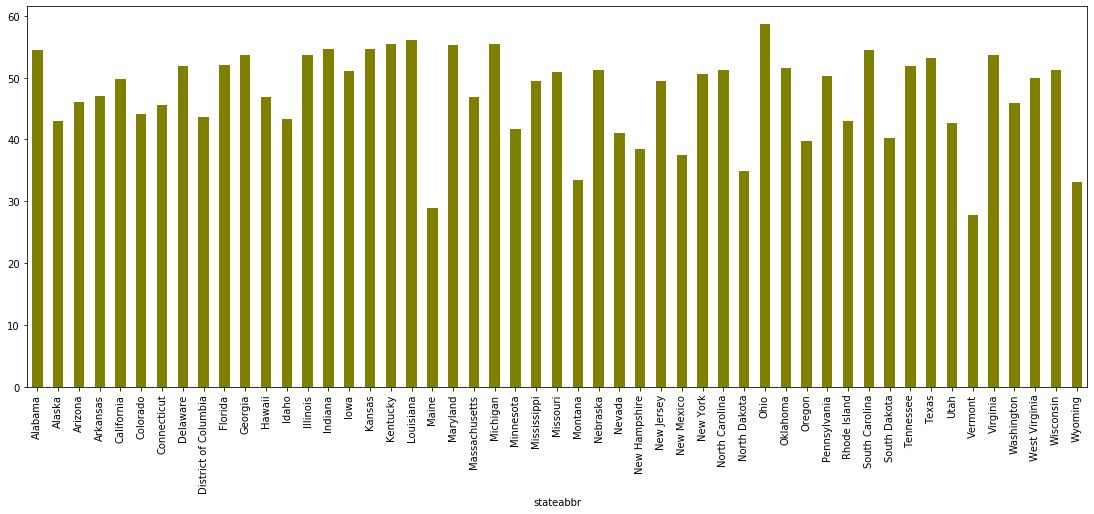

In [111]:
#COPD prevalence
plt.figure(figsize=(19,7)) # Figure size
census.groupby("stateabbr")['obesity_crudeprev'].max().plot(kind='bar', color='olive')

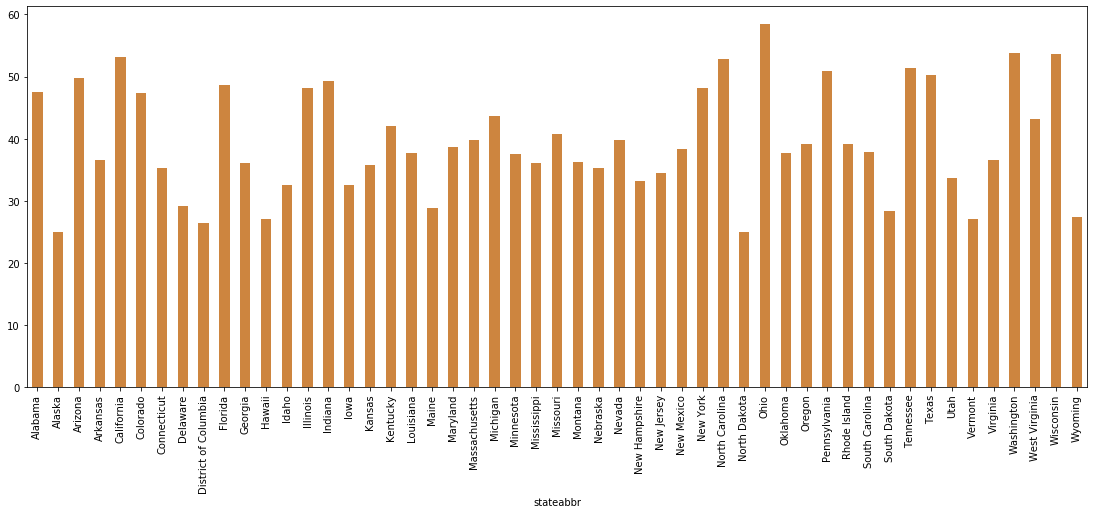

In [112]:
#arthritis prevalence
plt.figure(figsize=(19,7)) # Figure size
census.groupby("stateabbr")['arthritis_crudeprev'].max().plot(kind='bar', color='peru')

In [113]:
census=census.drop(['placename', 'geolocation'], axis = 1) 
census = census.rename(columns={'stateabbr': 'state'})

In [114]:
census = census.rename(columns={'bphigh_crudeprev': 'high bp prev', 'stroke_crudeprev': 'stroke prev'})


In [115]:
census=census.rename(columns={'diabetes_crudeprev': 'diabetes prev', 'cancer_crudeprev': 'cancer prev', 'arthritis_crudeprev': 'arthritis prev'})

In [116]:
census=census.rename(columns={'casthma_crudeprev': 'asthma prev', 'copd_crudeprev': 'copd prev', 'csmoking_crudeprev': 'smoking prev'})

In [117]:
census=census.rename(columns={'highchol_crudeprev': 'highChol prev', 'kidney_crudeprev': 'kidney prev'})
census

,state,high bp prev,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
0,Alabama,47.7,5.5,46.4,17.4,31.2,5.3,13.4,11.3,27.9,35.3,4.3
1,Alabama,48.2,6.1,47.8,19.8,30.5,4.7,12.5,11.9,29.3,36.8,4.6
2,Alabama,49.1,5.6,45.7,18.4,31.5,5.3,13.3,10.5,25.9,35.6,4.2
3,Alabama,54.1,7.3,48.0,22.4,35.0,6.0,13.6,12.3,26.3,38.4,5.3
4,Alabama,56.5,9.0,52.7,25.0,36.3,5.9,14.7,14.8,30.9,39.0,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...
27205,Wyoming,29.0,2.5,28.9,8.1,22.9,6.3,9.5,5.8,18.0,30.5,2.5
27206,Wyoming,33.1,3.3,25.6,8.8,27.3,9.0,9.2,6.2,14.2,32.5,3.1
27207,Wyoming,27.8,2.3,27.7,7.4,22.0,6.4,9.4,5.3,17.4,29.1,2.3
27208,Wyoming,31.9,3.2,30.9,9.4,25.2,6.9,9.9,7.0,19.8,31.9,3.0


In [118]:
census.describe()

,high bp prev,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
count,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000
mean,30.653208,3.211466,30.472922,10.811062,21.430129,5.648912,9.741352,6.309960,17.973047,31.364296,3.099666
std,8.260472,1.449541,8.180685,4.269441,5.995361,1.803257,1.710538,2.545739,6.114202,4.887047,0.960904
min,5.300000,0.300000,9.600000,0.800000,2.400000,0.700000,5.600000,1.000000,2.000000,6.900000,0.700000
25%,25.300000,2.300000,24.500000,7.900000,17.300000,4.500000,8.500000,4.500000,13.400000,28.800000,2.500000
50%,29.500000,2.900000,29.500000,10.000000,21.000000,5.500000,9.400000,5.800000,17.100000,31.700000,2.900000
75%,34.900000,3.800000,35.600000,12.900000,25.100000,6.600000,10.700000,7.600000,21.700000,34.400000,3.600000
max,70.300000,19.500000,58.600000,39.500000,58.400000,22.900000,17.800000,23.800000,50.300000,55.400000,12.300000


In [119]:
census.corr().style.background_gradient(cmap='cividis')

,high bp prev,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
high bp prev,1,0.929248,0.745852,0.899804,0.859888,0.414397,0.591753,0.852756,0.606235,0.767132,0.88513
stroke prev,0.929248,1,0.740103,0.935041,0.784451,0.293622,0.668484,0.901332,0.684947,0.66865,0.962226
obesity_crudeprev,0.745852,0.740103,1,0.775815,0.523238,-0.13016,0.718525,0.752574,0.851386,0.359479,0.706349
diabetes prev,0.899804,0.935041,0.775815,1,0.676042,0.153268,0.579688,0.816148,0.665321,0.673546,0.944776
arthritis prev,0.859888,0.784451,0.523238,0.676042,1,0.715015,0.480158,0.806639,0.437621,0.825677,0.746733
cancer prev,0.414397,0.293622,-0.13016,0.153268,0.715015,1,-0.115426,0.290831,-0.233211,0.704001,0.302181
asthma prev,0.591753,0.668484,0.718525,0.579688,0.480158,-0.115426,1,0.688672,0.777186,0.157677,0.607427
copd prev,0.852756,0.901332,0.752574,0.816148,0.806639,0.290831,0.688672,1,0.803823,0.651424,0.861767
smoking prev,0.606235,0.684947,0.851386,0.665321,0.437621,-0.233211,0.777186,0.803823,1,0.247406,0.630046
highChol prev,0.767132,0.66865,0.359479,0.673546,0.825677,0.704001,0.157677,0.651424,0.247406,1,0.706735


**df on COVID-19 Statistics**

In [159]:
stats = pd.read_csv("data/covid-statistics-by-us-states-daily-updates.csv")
stats=stats.replace(to_replace={state_abbrevs[x]:x for x in state_abbrevs})
#replace NaNs with zeros in the df
stats=stats.fillna(0)

In [121]:
# iterating the columns 
for col in stats.columns: 
    print(col)

date
state
positive
negative
pending
hospitalizedCurrently
hospitalizedCumulative
inIcuCurrently
inIcuCumulative
onVentilatorCurrently
onVentilatorCumulative
recovered
hash
dateChecked
death
hospitalized
total
totalTestResults
posNeg
fips
deathIncrease
hospitalizedIncrease
negativeIncrease
positiveIncrease
totalTestResultsIncrease


In [122]:
stats.drop(['hash', 'fips', 'dateChecked'], axis=1, inplace=True)
stats.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200410,AK,246.0,7186.0,0.0,0.0,28.0,0.0,0.0,0.0,...,7.0,28.0,7432,7432,7432,0.0,1.0,198.0,11.0,209.0
1,20200410,AL,2968.0,18058.0,0.0,0.0,368.0,0.0,0.0,0.0,...,80.0,368.0,21026,21026,21026,6.0,35.0,0.0,199.0,199.0
2,20200410,AR,1171.0,15949.0,0.0,86.0,130.0,0.0,43.0,33.0,...,23.0,130.0,17120,17120,17120,2.0,0.0,2117.0,52.0,2169.0
3,20200410,AS,0.0,20.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,31,20,20,0.0,0.0,0.0,0.0,0.0
4,20200410,AZ,3112.0,34622.0,0.0,0.0,0.0,0.0,0.0,0.0,...,97.0,0.0,37734,37734,37734,8.0,0.0,462.0,94.0,556.0


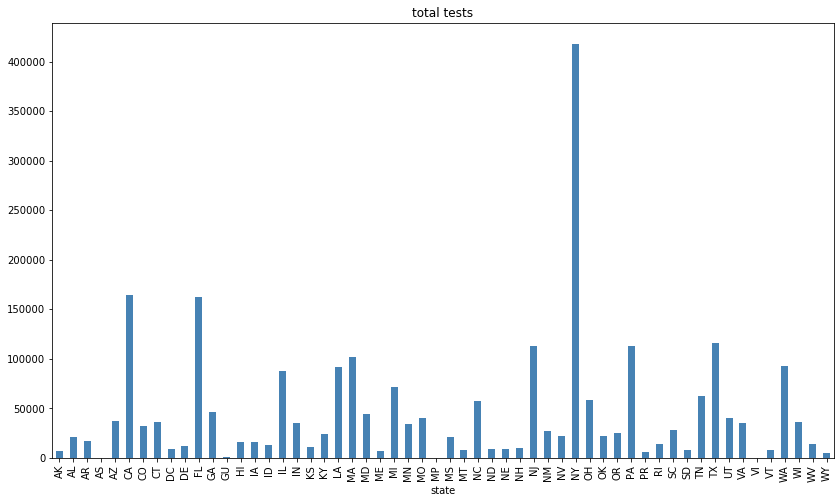

In [123]:
plt.figure(figsize=(14,8)) # Figure size
plt.title('total tests') # Title
stats.groupby("state")['totalTestResults'].max().plot(kind='bar', color='steelblue')

In [124]:
stats=stats[['date', 'state','positive','negative','hospitalized', 'death']]
stats.head()

,date,state,positive,negative,hospitalized,death
0,20200410,AK,246.0,7186.0,28.0,7.0
1,20200410,AL,2968.0,18058.0,368.0,80.0
2,20200410,AR,1171.0,15949.0,130.0,23.0
3,20200410,AS,0.0,20.0,0.0,0.0
4,20200410,AZ,3112.0,34622.0,0.0,97.0


In [125]:
stats.head(3)

,date,state,positive,negative,hospitalized,death
0,20200410,AK,246.0,7186.0,28.0,7.0
1,20200410,AL,2968.0,18058.0,368.0,80.0
2,20200410,AR,1171.0,15949.0,130.0,23.0


In [126]:
stats.describe()

,date,positive,negative,hospitalized,death
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.020034e+07,2306.301000,10288.535500,255.575000,63.291000
std,3.982625e+01,10408.280296,22351.157679,2105.399664,376.040525
min,2.020023e+07,0.000000,0.000000,0.000000,0.000000
25%,2.020032e+07,13.000000,94.000000,0.000000,0.000000
50%,2.020032e+07,149.000000,1612.500000,0.000000,2.000000
75%,2.020040e+07,986.500000,10412.750000,5.250000,18.250000
max,2.020041e+07,170512.000000,247373.000000,33159.000000,7844.000000


In [127]:
stats.corr().style.background_gradient(cmap='plasma')

,date,positive,negative,hospitalized,death
date,1,0.248426,0.481134,0.142588,0.221927
positive,0.248426,1,0.798124,0.925089,0.959415
negative,0.481134,0.798124,1,0.666971,0.722562
hospitalized,0.142588,0.925089,0.666971,1,0.910676
death,0.221927,0.959415,0.722562,0.910676,1


# What could be the risks across the US?   
In combining some of the dataframes provided by ROCHE, I visualize below some factors along with #COVID19 data.   
Further statistical analysis would be needed to reach scientific conclusion in this data.   
However, the presentation here could help in identifying future research angles relating to risk factors and   
COVID-19.   

In [161]:
# Merging the dataframes                       
a=pd.merge(USA, stats, how ='inner', on =('state', "date"))

,date,state,cases,deaths,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200228,Washington,1,0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9,9,9,53,0.0,0.0,0.0,0.0,0.0
1,20200228,Washington,2,0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9,9,9,53,0.0,0.0,0.0,0.0,0.0
2,20200228,Washington,4,0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9,9,9,53,0.0,0.0,0.0,0.0,0.0
3,20200229,Washington,4,1,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,18,18,18,53,1.0,0.0,0.0,9.0,9.0
4,20200229,Washington,2,0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,18,18,18,53,1.0,0.0,0.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42708,20200408,Wyoming,1,0,221.0,3843.0,0.0,0.0,33.0,0.0,...,33.0,4064,4064,4064,56,0.0,0.0,54.0,5.0,59.0
42709,20200408,Wyoming,5,0,221.0,3843.0,0.0,0.0,33.0,0.0,...,33.0,4064,4064,4064,56,0.0,0.0,54.0,5.0,59.0
42710,20200408,Wyoming,39,0,221.0,3843.0,0.0,0.0,33.0,0.0,...,33.0,4064,4064,4064,56,0.0,0.0,54.0,5.0,59.0
42711,20200408,Wyoming,2,0,221.0,3843.0,0.0,0.0,33.0,0.0,...,33.0,4064,4064,4064,56,0.0,0.0,54.0,5.0,59.0


In [58]:
dfs1=pd.concat([a,rank,chronic], sort=True) 
dfs1.head()

NameError: name 'a' is not defined

In [164]:
# Merging the dataframes                       
b=pd.concat([a, us_vuln], sort=False) 

,date,state,cases,deaths,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,ep_uninsur,epl_pov,epl_unemp,epl_age65,epl_age17,epl_disabl
0,20200228.0,Washington,1.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,20200228.0,Washington,2.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,20200228.0,Washington,4.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,20200229.0,Washington,4.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
4,20200229.0,Washington,2.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,NaN,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24.5,0.9277,0.9516,0.4715,0.8911,0.9815
3138,NaN,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,29.3,0.9952,0.9576,0.1442,0.9908,0.6558
3139,NaN,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18.4,0.9876,0.8611,0.1366,0.9685,0.9354
3140,NaN,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22.2,0.9697,0.9924,0.3200,0.9720,0.9274


In [165]:
# Merging the dataframes                       
c=pd.concat([b, census], sort=False) 
c

,date,state,cases,deaths,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
0,20200228.0,Washington,1.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20200228.0,Washington,2.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20200228.0,Washington,4.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20200229.0,Washington,4.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20200229.0,Washington,2.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,NaN,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5,28.9,8.1,22.9,6.3,9.5,5.8,18.0,30.5,2.5
27206,NaN,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.3,25.6,8.8,27.3,9.0,9.2,6.2,14.2,32.5,3.1
27207,NaN,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.3,27.7,7.4,22.0,6.4,9.4,5.3,17.4,29.1,2.3
27208,NaN,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2,30.9,9.4,25.2,6.9,9.9,7.0,19.8,31.9,3.0


In [166]:
#replace NaNs with zeros in the df
c=c.fillna(0)
c.head()


,date,state,cases,deaths,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
0,20200228.0,Washington,1.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20200228.0,Washington,2.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20200228.0,Washington,4.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20200229.0,Washington,4.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20200229.0,Washington,2.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
# iterating the columns to list their names
for col in c.columns: 
    print(col)

date
state
cases
deaths
positive
negative
pending
hospitalizedCurrently
hospitalizedCumulative
inIcuCurrently
inIcuCumulative
onVentilatorCurrently
onVentilatorCumulative
recovered
hash
dateChecked
death
hospitalized
total
totalTestResults
posNeg
fips
deathIncrease
hospitalizedIncrease
negativeIncrease
positiveIncrease
totalTestResultsIncrease
ep_uninsur
epl_pov
epl_unemp
epl_age65
epl_age17
epl_disabl
high bp prev
stroke prev
obesity_crudeprev
diabetes prev
arthritis prev
cancer prev
asthma prev
copd prev
smoking prev
highChol prev
kidney prev


In [175]:
# Grouped df by date and state and extract a number of stats from each group
d=c.groupby(
   ['date', 'state'], as_index = False
).agg(
    {
        "cases":max,
        "deaths":max,
        "positive":max,
        "negative":max,
        "pending":max,
        "hospitalizedCurrently":max,
        "hospitalizedCumulative":max,
        "inIcuCurrently":max,
        "inIcuCumulative":max,
        "onVentilatorCurrently":max,
        "onVentilatorCumulative":max,
        "recovered":max,
        "hash":max,
        "dateChecked":max,
        "death":max,
        "hospitalized":max,
        "total":max,
        "totalTestResults":max,
        "posNeg":max,
        "fips":max,
        "deathIncrease":max,
        "hospitalizedIncrease":max,
        "negativeIncrease":max,
        "positiveIncrease":max,
        "totalTestResultsIncrease":max,
        "ep_uninsur":max,
        "epl_pov":max,
        "epl_unemp":max,
        "epl_age65":max,
        "epl_age17":max,
        "epl_disabl":max,
        "high bp prev":max,
        "stroke prev":max,
        "obesity_crudeprev":max,
        "diabetes prev":max,
        "arthritis prev":max,
        "cancer prev":max,
        "asthma prev":max,
        "copd prev":max,
        "smoking prev":max,
        "highChol prev":max,
        "kidney prev":max,
    }
)
d

,date,state,cases,deaths,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
0,0.0,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.7,54.4,33.1,47.5,12.7,17.0,17.6,35.9,46.2,8.4
1,0.0,Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.6,42.9,11.6,24.9,8.3,10.6,6.8,28.7,36.2,3.4
2,0.0,Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.4,46.1,20.7,49.7,18.8,13.1,16.5,30.9,52.1,8.0
3,0.0,Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.3,47.0,21.0,36.6,9.7,12.3,11.7,35.1,40.2,5.5
4,0.0,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,49.7,25.5,53.2,22.9,13.7,16.9,36.4,50.5,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,20200408.0,Virginia,570.0,33.0,3645.0,27000.0,0.0,0.0,615.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1724,20200408.0,Washington,3690.0,246.0,9608.0,83391.0,0.0,639.0,0.0,181.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1725,20200408.0,West Virginia,73.0,1.0,462.0,12083.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1726,20200408.0,Wisconsin,1417.0,59.0,2756.0,30115.0,0.0,0.0,790.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
sub1=d[d.date==0]
sub2=d[d.date!=0]

In [179]:
sub2=sub2[['state', 'cases', 'deaths', 'hospitalized']]
sub2.head()

,state,cases,deaths,hospitalized
52,Washington,4.0,0.0,0.0
53,Washington,4.0,1.0,0.0
54,Rhode Island,2.0,0.0,0.0
55,Washington,11.0,3.0,0.0
56,Rhode Island,2.0,0.0,0.0


In [180]:
# Merging the dataframes                       
risks=pd.merge(sub1, sub2, how ='inner', on ='state')
risks=risks.drop(['date'], axis = 1) 


In [181]:
sum_column = risks["hospitalized_x"] + risks["hospitalized_y"]
risks["hospitalized"] = sum_column


In [182]:
risks=risks.drop(['hospitalized_x','hospitalized_y'], axis = 1) 

In [183]:
sum_column2 = risks["cases_x"] + risks["cases_y"]
risks["cases"] = sum_column2
sum_column3 = risks["deaths_x"] + risks["deaths_y"]
risks["deaths"] = sum_column3

In [184]:
risks=risks.drop(['cases_x','cases_y', 'deaths_x','deaths_y'], axis = 1) 
risks

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev,hospitalized,cases,deaths
0,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47.5,12.7,17.0,17.6,35.9,46.2,8.4,0.0,2.0,0.0
1,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47.5,12.7,17.0,17.6,35.9,46.2,8.4,0.0,6.0,0.0
2,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47.5,12.7,17.0,17.6,35.9,46.2,8.4,0.0,13.0,0.0
3,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47.5,12.7,17.0,17.6,35.9,46.2,8.4,0.0,17.0,0.0
4,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47.5,12.7,17.0,17.6,35.9,46.2,8.4,0.0,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,Wyoming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.3,9.0,10.9,7.0,26.3,33.5,3.1,23.0,42.0,0.0
1672,Wyoming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.3,9.0,10.9,7.0,26.3,33.5,3.1,23.0,44.0,0.0
1673,Wyoming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.3,9.0,10.9,7.0,26.3,33.5,3.1,23.0,45.0,0.0
1674,Wyoming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.3,9.0,10.9,7.0,26.3,33.5,3.1,33.0,48.0,0.0


In [191]:
# Grouped df by date and state and extract a number of stats from each group
r=risks.groupby(
   ['state'], as_index = False).agg(    
    {
         'hospitalized':max,    # max values 
         'cases':max,
         'deaths': max,
         #'num_uninsured':max, 
         #'percent_vaccinated': max, 
         #'num_uninsured': max,
         #'percent_american_indian_alaska_native':max,        
         #'percent_asian':max,
         #'percent_black':max,        
        #'percent_excessive_drinking':max,
        #'percent_female':max,
        #'percent_hispanic':max,
        #'percent_native_hawaiian_other_pacific_islander':max,
        #'percent_non_hispanic_white':max,
        'epl_pov':max,
        'epl_unemp': max,
        'epl_age65':max,
        'epl_age17':max,
        'epl_disabl':max,
        'high bp prev':max,
        'stroke prev':max,
        'obesity_crudeprev':max,
        'diabetes prev':max,
        'arthritis prev':max,
        'cancer prev':max,
        'asthma prev':max,
        'copd prev':max,
        'smoking prev':max,
        'highChol prev':max,
        'kidney prev':max
         
    }
)

r

,state,hospitalized,cases,deaths,epl_pov,epl_unemp,epl_age65,epl_age17,epl_disabl,high bp prev,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
0,Alabama,314.0,492.0,14.0,0.9971,0.9946,0.8249,0.8188,0.9911,65.9,11.7,54.4,33.1,47.5,12.7,17.0,17.6,35.9,46.2,8.4
1,Alaska,27.0,103.0,4.0,0.9959,1.0000,0.9035,1.0000,0.8816,35.1,3.6,42.9,11.6,24.9,8.3,10.6,6.8,28.7,36.2,3.4
2,Arizona,0.0,1559.0,37.0,0.9882,0.9841,0.9987,0.9465,0.9156,57.6,8.4,46.1,20.7,49.7,18.8,13.1,16.5,30.9,52.1,8.0
3,Arkansas,148.0,201.0,7.0,0.9825,0.9869,0.9879,0.9580,0.9892,55.5,7.3,47.0,21.0,36.6,9.7,12.3,11.7,35.1,40.2,5.5
4,California,0.0,7530.0,198.0,0.9261,0.9952,0.9787,0.9790,0.8816,57.3,10.0,49.7,25.5,53.2,22.9,13.7,16.9,36.4,50.5,7.8
5,Colorado,1079.0,927.0,33.0,0.9713,0.9920,0.9981,0.9927,0.9901,50.5,7.3,44.1,19.1,47.3,17.9,13.7,14.2,41.5,50.1,6.0
6,Connecticut,0.0,4417.0,155.0,0.3061,0.7347,0.6788,0.5915,0.3200,47.9,8.2,45.6,23.9,35.3,9.6,15.4,14.1,30.9,41.7,6.9
7,Delaware,0.0,636.0,11.0,0.4169,0.6376,0.9414,0.6176,0.4075,52.0,7.5,51.9,22.4,29.1,9.0,14.6,12.8,35.4,36.8,5.6
8,District of Columbia,0.0,1440.0,27.0,0.0000,0.0000,0.0000,0.0000,0.0000,45.8,6.9,43.6,17.5,26.4,10.5,15.3,11.7,36.5,39.8,4.9
9,Florida,2062.0,5460.0,69.0,0.9682,0.9834,1.0000,0.9201,0.9605,67.2,13.6,52.1,30.9,48.6,19.8,14.4,20.4,37.9,51.4,8.9


In [192]:
r.describe()

,hospitalized,cases,deaths,epl_pov,epl_unemp,epl_age65,epl_age17,epl_disabl,high bp prev,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,961.549020,3362.470588,146.137255,0.863675,0.882594,0.922988,0.845386,0.863498,51.705882,8.200000,47.258824,22.343137,39.537255,13.472549,14.003922,13.864706,34.521569,43.515686,6.282353
std,4560.375661,11482.281979,638.934489,0.212464,0.183534,0.154078,0.228184,0.208654,10.343605,3.109276,7.342593,7.074836,8.743362,4.127230,1.975648,4.368882,6.966156,5.552382,1.766319
min,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.600000,3.100000,27.700000,8.400000,24.900000,7.800000,9.700000,6.700000,19.700000,30.700000,3.000000
25%,0.000000,299.000000,9.500000,0.847450,0.844100,0.916600,0.801650,0.816300,44.400000,6.100000,42.900000,18.250000,34.050000,10.300000,12.550000,11.300000,29.700000,39.700000,5.150000
50%,42.000000,830.000000,20.000000,0.960500,0.972300,0.978700,0.955700,0.960500,54.300000,8.400000,49.700000,23.400000,37.900000,12.400000,14.200000,14.100000,35.100000,42.800000,6.500000
75%,419.500000,2084.000000,60.500000,0.984250,0.991700,0.991700,0.986000,0.986150,59.250000,9.950000,52.600000,26.550000,47.850000,16.800000,15.400000,17.000000,38.700000,48.250000,7.300000
max,32669.000000,81803.000000,4571.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.300000,19.500000,58.600000,39.500000,58.400000,22.900000,17.800000,23.800000,50.300000,55.400000,12.300000


In [193]:
r.corr().style.background_gradient(cmap='cubehelix')

,hospitalized,cases,deaths,epl_pov,epl_unemp,epl_age65,epl_age17,epl_disabl,high bp prev,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
hospitalized,1,0.969913,0.980778,0.0900026,0.0677698,0.0697332,0.0694539,0.0884327,0.28967,0.559636,0.0998609,0.384653,0.174232,0.209531,0.224135,0.36586,0.175416,0.337373,0.520137
cases,0.969913,1,0.994928,0.0663678,0.0780229,0.0563371,0.0590035,0.056443,0.328428,0.592869,0.132708,0.419123,0.219212,0.264547,0.264977,0.413935,0.208309,0.376283,0.563835
deaths,0.980778,0.994928,1,0.0680301,0.0696235,0.0558243,0.0643858,0.0661696,0.298955,0.562505,0.104625,0.388978,0.182863,0.218824,0.238323,0.375703,0.178793,0.339313,0.532832
epl_pov,0.0900026,0.0663678,0.0680301,1,0.897146,0.707218,0.848933,0.812149,0.340087,0.24591,0.288529,0.254437,0.427739,0.385761,-0.0320566,0.219405,0.244436,0.377684,0.256277
epl_unemp,0.0677698,0.0780229,0.0696235,0.897146,1,0.763342,0.788798,0.721652,0.366184,0.273002,0.293719,0.297534,0.407385,0.322655,0.0133096,0.278694,0.262784,0.347451,0.291891
epl_age65,0.0697332,0.0563371,0.0558243,0.707218,0.763342,1,0.669544,0.654436,0.12045,0.0928457,0.0620423,0.0612057,0.318187,0.287355,-0.133949,0.108123,0.0503755,0.148154,0.117741
epl_age17,0.0694539,0.0590035,0.0643858,0.848933,0.788798,0.669544,1,0.638397,0.281826,0.208996,0.255133,0.187737,0.339873,0.363473,-0.133822,0.0962998,0.136474,0.297597,0.221812
epl_disabl,0.0884327,0.056443,0.0661696,0.812149,0.721652,0.654436,0.638397,1,0.286198,0.198038,0.190733,0.217539,0.403673,0.384679,0.00835123,0.20071,0.166057,0.369511,0.221258
high bp prev,0.28967,0.328428,0.298955,0.340087,0.366184,0.12045,0.281826,0.286198,1,0.894266,0.853146,0.927111,0.755444,0.569888,0.740726,0.874336,0.734119,0.819968,0.893389
stroke prev,0.559636,0.592869,0.562505,0.24591,0.273002,0.0928457,0.208996,0.198038,0.894266,1,0.742685,0.931246,0.694355,0.545279,0.759812,0.891236,0.691173,0.764845,0.967375
